# Nothing But NumPy: A 3-layer neural network

Part of the blog ["Nothing but NumPy: Understanding &amp; Creating neural networks with computational graphs from scratch"](https://medium.com/@rafayak/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0)

In this notebook we'll see ow to create a 3-layer nueral network (i.e. two hidden and one output layer) and training it on the XOR data.


First, let's import NumPy, our layers and helper functions.

_Feel free to look into the helper functions in the `utils` directory_   

In [1]:
import numpy as np
import matplotlib.pyplot
from util.utilities import *
from Layers.LinearLayer import LinearLayer
from Layers.ActivationLayer import SigmoidLayer
%matplotlib inline

#### The XOR data:


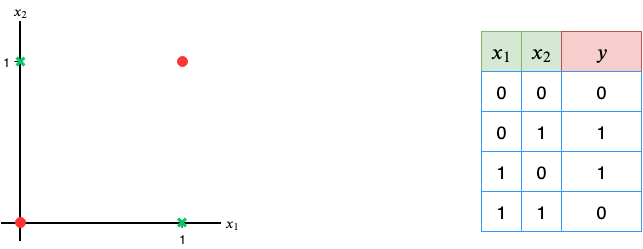

In [2]:
# This is our XOR gate data 

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [3]:
X_train = X.T
Y_train = Y.T

The 3 layer neural network architecture looks as follows:


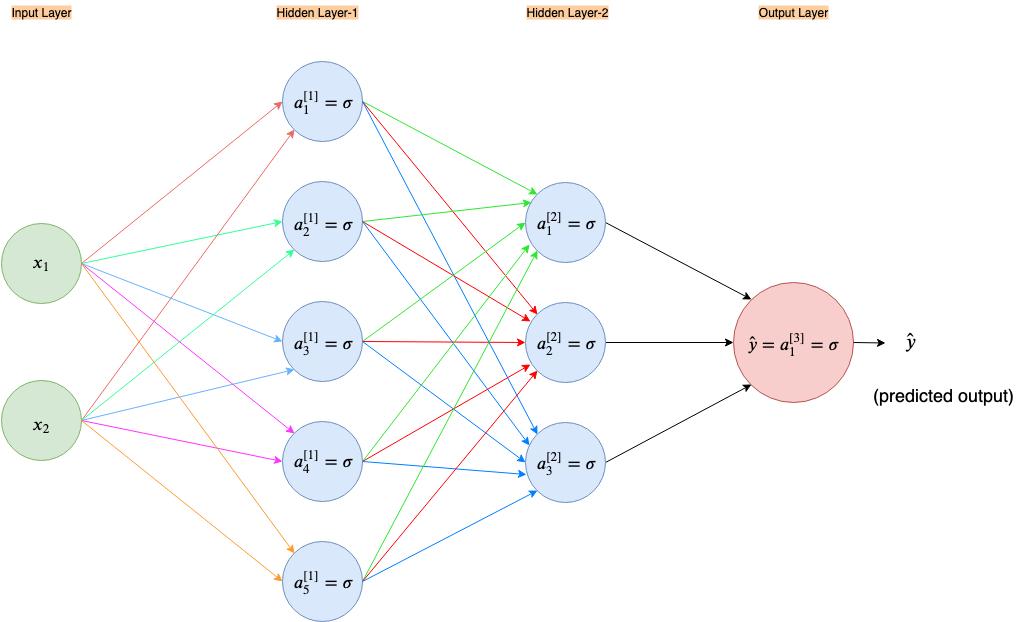

In [4]:
# define training constants
learning_rate = 1
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable


# Our network architecture has the shape: 
#               (input)--> [Linear->Sigmoid] -> [Linear->Sigmoid]->[Linear->Sigmoid] -->(output)  

#------ LAYER-1 ----- define hidden layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=5, ini_type='xavier')
A1 = SigmoidLayer(Z1.Z.shape)

#------ LAYER-2 ----- define output layer that take is values from hidden layer
Z2= LinearLayer(input_shape=A1.A.shape, n_out=3, ini_type='xavier')
A2= SigmoidLayer(Z2.Z.shape)


#------ LAYER-3 ----- define output layer that take is values from 2nd hidden layer
Z3= LinearLayer(input_shape=A2.A.shape, n_out=1, ini_type='xavier')
A3= SigmoidLayer(Z3.Z.shape)

# see what random weights and bias were selected and their shape 
# print(Z1.params)
# print(Z2.params)
# print(Z3.params)

Now we can start the training loop.

In [5]:
costs = [] # initially empty list, this will store all the costs after a certian number of epochs

# Start training
for epoch in range(number_of_epochs):
    
    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    Z2.forward(A1.A)
    A2.forward(Z2.Z)
    
    Z3.forward(A2.A)
    A3.forward(Z3.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dA3 = compute_cost(Y=Y_train, Y_hat=A3.A)
    
    # print and store Costs every 100 iterations.
    if (epoch % 100) == 0:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)
    
    # ------------------------- back-prop ----------------------------
    A3.backward(dA3)
    Z3.backward(A3.dZ)
    
    A2.backward(Z3.dA_prev)
    Z2.backward(A2.dZ)
    
    A1.backward(Z2.dA_prev)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z3.update_params(learning_rate=learning_rate)
    Z2.update_params(learning_rate=learning_rate)
    Z1.update_params(learning_rate=learning_rate)

# See what the final weights and bias are training 
# print(Z1.params)
# print(Z2.params)
# print(Z3.params)

Cost at epoch#0: 0.12580048583996017
Cost at epoch#100: 0.12488800620460391
Cost at epoch#200: 0.1248544745100407
Cost at epoch#300: 0.12481135430735724
Cost at epoch#400: 0.12475501281371584
Cost at epoch#500: 0.12468009633443186
Cost at epoch#600: 0.12457849324582021
Cost at epoch#700: 0.12443755028774649
Cost at epoch#800: 0.1242369265778672
Cost at epoch#900: 0.12394291469995844
Cost at epoch#1000: 0.12349798488056588
Cost at epoch#1100: 0.1228012603028108
Cost at epoch#1200: 0.12167195753653542
Cost at epoch#1300: 0.11978312534788918
Cost at epoch#1400: 0.1165609953789445
Cost at epoch#1500: 0.11114475840867588
Cost at epoch#1600: 0.10280346921569668
Cost at epoch#1700: 0.09162334961696444
Cost at epoch#1800: 0.07586830923185872
Cost at epoch#1900: 0.04926397861977669
Cost at epoch#2000: 0.023658380552436506
Cost at epoch#2100: 0.011797687706814072
Cost at epoch#2200: 0.006918317173057669
Cost at epoch#2300: 0.004605942643578608
Cost at epoch#2400: 0.0033424679670456398
Cost at ep

`predict` helper function returns three things:
- `p`: predicted labels (output 1 if predictded output is greater than 0.5) 
- `probas`: raw probabilities (how sure the neural net thinks the output is 1, this is just Y_hat) 
- `accuracy`: the number of correct predictions from total predictions

In the cell below we are not storing `probas`( pythonic way is to use `_` it its place)  

In [7]:
# see the ouptput predictions
predicted_outputs, _, accuracy = predict(X=X_train, Y=Y_train, Zs=[Z1, Z2, Z3], As=[A1, A2, A3])

print("The predicted outputs:\n {}".format(predicted_outputs))
print("The accuracy of the model is: {}%".format(accuracy))

The predicted outputs:
 [[ 0.  1.  1.  0.]]
The accuracy of the model is: 100.0%


#### The learning curve

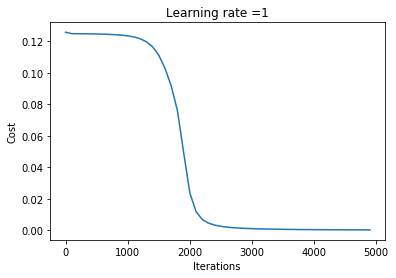

In [8]:
plot_learning_curve(costs=costs, learning_rate=learning_rate, total_epochs=number_of_epochs)

#### The decision boundary

With more hidden layers our deeper neural network is able to learn a much more complex decision boundary

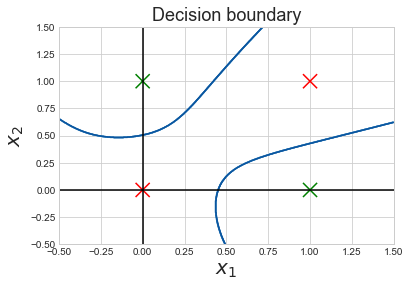

In [9]:
plot_decision_boundary(lambda x:predict_dec(Zs=[Z1, Z2, Z3], As=[A1, A2, A3], X=x.T), X_train.T, Y_train.T)

#### The shaded decision boundary

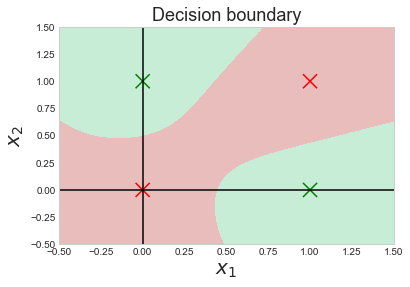

In [10]:
plot_decision_boundary_shaded(lambda x:predict_dec(Zs=[Z1, Z2, Z3], As=[A1, A2, A3], X=x.T), X_train.T, Y_train.T)